In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [119]:
from tensorflow import keras
import tensorflow as tf

train_data = pd.read_csv('../input/digit-recognizer/train.csv')
test_data = pd.read_csv('../input/digit-recognizer/test.csv')

X = train_data.drop(['label'],axis=1)
y = train_data['label']
total_clf = X.shape[1]



In [120]:
from sklearn.model_selection import train_test_split

X_train = (train_data.iloc[:, 1:].values).astype('float32')
y_train = (train_data.iloc[:, 0].values).astype('int32')

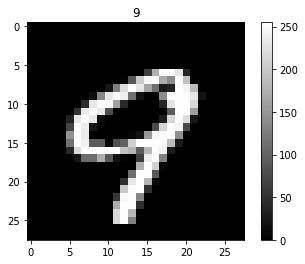

In [121]:
import matplotlib.pyplot as plt

X_reshaped = X_train.reshape(X_train.shape[0], 28, 28)

X_train = X_train/255

plt.figure()
plt.imshow(X_reshaped[100], cmap=plt.get_cmap('gray'))
plt.title(y_train[100]);
plt.colorbar()



In [122]:
X_test = (test_data.iloc[:,0:].values).astype('float32')

X_test = X_test/255


In [123]:
from tensorflow.keras import layers

input_shape = X.shape[1]

model = keras.Sequential([
    
    layers.Flatten(input_shape=[input_shape]),
    
    layers.Dense(256,activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(total_clf,activation='softmax')
])

In [124]:
from tensorflow.keras.callbacks import EarlyStopping


model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_19 (Dense)             (None, 784)               201488    
Total params: 403,472
Trainable params: 402,960
Non-trainable params: 512
_________________________________________________________________


In [126]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10,
                                    min_delta=0.001,
                                    restore_best_weights=True)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


history = model.fit(X_train,y_train,epochs=250,callbacks=early_stopping)

Epoch 1/250
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4380 - accuracy: 0.9047
Epoch 2/250
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1721 - accuracy: 0.9469
Epoch 3/250
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1418 - accuracy: 0.9561
Epoch 4/250
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1230 - accuracy: 0.9621
Epoch 5/250
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1116 - accuracy: 0.9645
Epoch 6/250
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1059 - accuracy: 0.9666
Epoch 7/250
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0937 - accuracy: 0.9699
Epoch 8/250
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0889 - accuracy: 0.9710
Epoch 9/250
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0839 - accuracy: 0.9732
Epoch 10/250
1313/1313 [==============================] - 6s 5ms/step - l

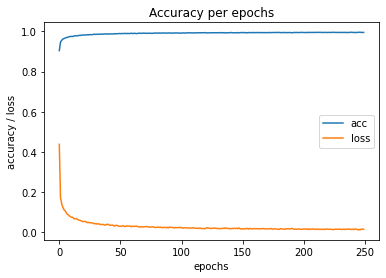

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Accuracy per epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy / loss')
plt.legend(['acc','loss'],)

In [136]:
model.save('model_digrec_1Node_.h5')

In [137]:
results = model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)

In [138]:
pd.read_csv('./submission.csv').head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
